In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df_p = pd.read_csv('../app/app/playerevals/players.csv')
players = df_p['player'].values
from collections import Counter

import random, string
codes = [''.join(random.choices(string.ascii_letters + string.digits, k=5)).lower() for _ in range(20)]


r = []
c = Counter()
for p, name in enumerate(players):
    _r, f = [], 0
    for f in range(p+1, p+8+1):
        _r.append(players[f % len(players)])
    pp = [pp for pp in _r if pp != name][:8]
    random.shuffle(pp)
    c.update(pp)
    r.append({
        'reviewer': name,
        'code': codes[p],
        'players': '|'.join(pp),
    })
    print(name, codes[p], pp)
print(c.most_common())
pd.DataFrame(r).to_csv('../app/app/playerevals/reviewers.csv')

Marty 0lrcg ['Yang', 'Enoch', 'Jasper', 'Mike', 'Michael', 'Stefano', 'Jorge', 'Gerard']
Stefano o3efa ['Niokhor', 'Yang', 'Enoch', 'Jorge', 'Mike', 'Michael', 'Jasper', 'Gerard']
Gerard i9vlc ['Mike', 'Jasper', 'Yang', 'Jorge', 'Ashish', 'Michael', 'Niokhor', 'Enoch']
Yang sqxoq ['Michael', 'Mike', 'Jorge', 'Ashish', 'Jasper', 'Everett', 'Enoch', 'Niokhor']
Jorge xki7h ['Everett', 'Michael', 'Jasper', 'Ashish', 'Mike', 'Enoch', 'Niokhor', 'Joao']
Mike rgbrk ['Joao', 'Ashish', 'Everett', 'Enoch', 'Emanuel', 'Niokhor', 'Jasper', 'Michael']
Michael kvjyv ['Kazuki', 'Ashish', 'Emanuel', 'Enoch', 'Niokhor', 'Joao', 'Jasper', 'Everett']
Enoch dkk4m ['Kazuki', 'Jasper', 'Mark', 'Niokhor', 'Joao', 'Ashish', 'Emanuel', 'Everett']
Jasper gl2ox ['Everett', 'Niokhor', 'Mash', 'Kazuki', 'Mark', 'Ashish', 'Emanuel', 'Joao']
Niokhor hbiwb ['Everett', 'Kazuki', 'Marty', 'Joao', 'Ashish', 'Mash', 'Mark', 'Emanuel']
Ashish kodm0 ['Joao', 'Stefano', 'Kazuki', 'Everett', 'Emanuel', 'Marty', 'Mark', 'Mash

In [108]:
df = pd.read_csv('/Users/joeDiHare/Documents/projects/playerEval/analysis/Player Eval (Responses) - Form Responses 1.csv')

df = df.dropna(axis=1, how='all')
df = df.rename(columns={
    'Please insert your personal code (5 alphanumeric characters that Yang emailed you) ': 'pic',
    'Select Player to evaluate': 'player',
    'What is the ideal position for this player?': 'position',
    'Timestamp': 'ts',
    '(optional) Would you nominate this player for': 'nomination',
    'What could the player improve upon?': 'feedback',
  })
df = df.rename(columns=lambda x: x.split('[')[1][:-1].lower() if 'Skills (definition' in x[:20] else x.lower())
df = df.replace({'1 (needs improvement)': '1', '5 (excellent)': '5'})
df = df.replace({'12345': 'J', 'StudFinder15': 'M', 'StudFinder15 ':'M', '77777':'Y', '83451':'G'})
df = df.drop_duplicates(subset=['player', 'pic'], keep='first')
common = ['ts', 'player', 'feedback','position', 'pic', 'nomination']
skills = list(set(df.columns) - set(common))
df[skills] = df[skills].astype(int)
df.head()

,ts,player,feedback,position,nomination,awareness,composure,interceptions,marking,positioning,...,dribbling,finishing,long passing,short passing,standing tackle,communication during game,ball shielding,supportive to teammates,pic,attacking creativity and deception
0,2/23/2021 7:47:57,Jasper,Vision and long pass execution,"[2] Right/Left Wing-Back, [7] Winger",NaN,2,3,3,3,2,...,4,2,2,3,3,3,4,3,J,4
1,2/23/2021 7:51:26,Ashish,Deception and control on the ball.,"[2] Right/Left Wing-Back, [3] Centre Back",Best Reverse Tempo Practitioner,4,3,4,4,4,...,2,2,3,3,4,4,2,4,J,2
2,2/23/2021 7:55:17,Mike,Balance and strength,[7] Winger,Participation Award,2,2,3,2,3,...,2,1,2,3,4,3,3,2,J,2
3,2/23/2021 8:00:30,Emmanuel,Wider passing angle and more involved in the b...,"[7] Winger, [8] Wide midfield, [10] Attacking ...",Most Improved Player,3,4,3,3,3,...,4,3,3,4,4,3,4,4,J,4
4,2/23/2021 8:05:05,Jack,More vocal on the pitch and more patient decis...,"[5] Defensive midfield, [6] Centre midfield, [...",Most Athletic Player,3,4,4,4,4,...,4,3,4,4,4,4,4,4,J,3


In [109]:
df.groupby('pic').count()

,ts,player,feedback,position,nomination,awareness,composure,interceptions,marking,positioning,...,defending,dribbling,finishing,long passing,short passing,standing tackle,communication during game,ball shielding,supportive to teammates,attacking creativity and deception
pic,,,,,,,,,,,,,,,,,,,,,
G,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
J,5,5,5,5,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
M,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
S,5,5,5,5,2,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Y,5,5,5,5,0,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [275]:
S

,awareness,composure,interceptions,marking,positioning,vision,acceleration,agility,balance,pace,...,defending,dribbling,finishing,long passing,short passing,standing tackle,communication during game,ball shielding,supportive to teammates,attacking creativity and deception
player,,,,,,,,,,,,,,,,,,,,,
Ashish,0.547723,0.547723,0.447214,0.447214,0.000000,0.836660,0.894427,1.000000,0.000000,0.547723,...,0.447214,0.707107,0.447214,0.447214,0.447214,0.836660,0.447214,1.140175,0.447214,0.547723
Emmanuel,0.447214,0.447214,0.707107,0.547723,0.447214,0.447214,0.000000,0.447214,0.547723,0.447214,...,1.483240,0.447214,0.836660,0.447214,0.000000,1.224745,0.707107,0.547723,0.547723,0.447214
Jack,0.836660,0.836660,0.447214,0.547723,0.547723,0.547723,0.447214,0.547723,0.447214,0.447214,...,0.836660,0.447214,0.836660,0.836660,0.547723,1.000000,0.447214,0.547723,0.447214,0.836660
Jasper,0.547723,0.836660,0.547723,1.000000,0.894427,0.447214,0.894427,1.000000,0.707107,0.547723,...,0.547723,0.836660,0.447214,1.095445,0.707107,0.894427,0.836660,0.447214,0.547723,0.547723
Mike,0.836660,0.547723,0.547723,0.447214,0.836660,1.303840,0.547723,0.547723,0.707107,0.547723,...,0.447214,0.547723,1.303840,0.836660,0.547723,1.095445,1.095445,0.547723,0.894427,0.547723


In [106]:
df[df['pic']=='M']

,ts,player,feedback,position,nomination,awareness,composure,interceptions,marking,positioning,...,dribbling,finishing,long passing,short passing,standing tackle,communication during game,ball shielding,supportive to teammates,pic,attacking creativity and deception
5,2/23/2021 9:32:24,Emmanuel,Active game communication,"[2] Right/Left Wing-Back, [5] Defensive midfie...",Rookie of the Year,4,5,4,3,4,...,3,4,3,4,4,2,3,4,M,4
6,2/23/2021 9:36:13,Ashish,Finding space when not on the ball,"[4] Sweeper, [5] Defensive midfield, [8] Wide ...",Most mysterious,4,4,4,4,4,...,3,3,4,3,5,4,4,4,M,3
7,2/23/2021 9:39:23,Jasper,Game awareness. Too much day dreaming,"[7] Winger, [8] Wide midfield, [10] Attacking ...","Most Athletic Player, Most Late for Training",1,1,2,1,1,...,2,3,1,2,4,4,3,2,M,3
8,2/23/2021 9:42:37,Jack,Stick with the simple dribbling,"[7] Winger, [8] Wide midfield, [9] Second stri...","Year MVP, Most Improved Player, Most Athletic ...",5,3,3,4,3,...,4,5,2,3,2,4,4,4,M,4
9,2/23/2021 9:45:16,Mike,Alot,"[5] Defensive midfield, [9] Second striker","Top Diver, Participation Award",3,3,3,2,3,...,1,3,1,3,4,5,2,4,M,2
10,2/23/2021 9:45:32,Mike,Alot,"[5] Defensive midfield, [9] Second striker","Top Diver, Participation Award",3,3,3,2,3,...,1,3,1,3,4,5,2,4,M,2


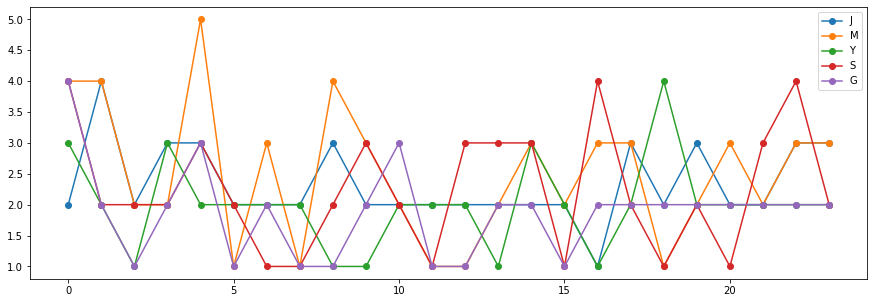

In [110]:
_df = df[df['player']=='Mike']
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
vals = []
for pic in _df['pic'].unique():
    v = _df[_df['pic']==pic][skills].values[0]
    ax.plot(v, '-o', label=pic)
    vals.append(v)
ax.legend()

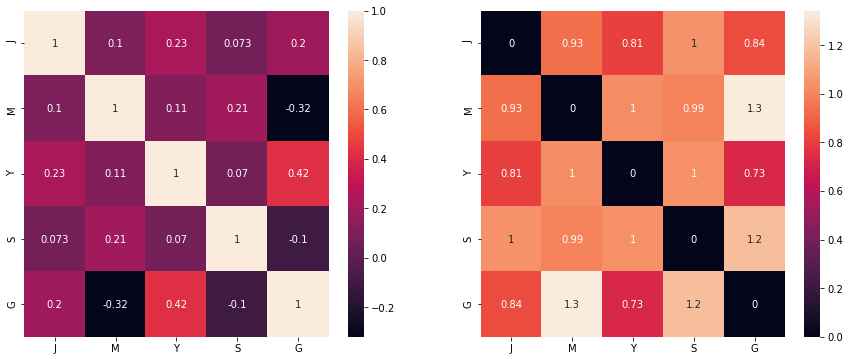

In [279]:
PIC = df['pic'].unique()
res = np.zeros((len(PIC), len(PIC)))
err = np.zeros((len(PIC), len(PIC)))
for r, pic1 in enumerate(PIC):
    for c, pic2 in enumerate(PIC):
        v1 = df[df['pic']==pic1][skills].values.reshape((1, -1))
        v2 = df[df['pic']==pic2][skills].values.reshape((1, -1))
        res[r][c] = np.corrcoef(v1, v2)[0][1]
        err[r][c] = np.mean(abs(v1 - v2))
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(res, annot = True, ax=ax[0]);
ax[0].set_yticklabels(PIC); ax[0].set_xticklabels(PIC);
sns.heatmap(err, annot = True, ax=ax[1]);
ax[1].set_yticklabels(PIC); ax[1].set_xticklabels(PIC);

In [130]:
PIC = df['pic'].unique()
# res = np.zeros((len(PIC), len(PIC)))
for r, skill in enumerate(skills):
    _df = df[['pic', 'player', skill]]
#     for c, pic2 in enumerate(PIC):
#         v1 = df[df['pic']==pic1][skills].values.reshape((1, -1))
#         v2 = df[df['pic']==pic2][skills].values.reshape((1, -1))
#         res[r][c] = np.corrcoef(v1, v2)[0][1]
# fig, ax = plt.subplots(1, 1, figsize=(7, 6))
# sns.heatmap(res, annot = True, ax=ax);
# ax.set_yticklabels(PIC)
# ax.set_xticklabels(PIC);


,short passing
player,
Ashish,0.447214
Emmanuel,0.000000
Jack,0.547723
Jasper,0.707107
Mike,0.547723


In [271]:
np.round(20 * df.groupby('player').mean()[skills].mean(axis=1))

player
Ashish      63.0
Emmanuel    67.0
Jack        76.0
Jasper      55.0
Mike        44.0
dtype: float64

In [167]:
np.sum(np.sum(_df.groupby('player').std()))

57.9827560572969

In [177]:
S = df.groupby('player').std()
S.mean().sort_values().index
clm = ['short passing', 'balance', 'pace', 'interceptions', 'positioning',
       'acceleration', 'supportive to teammates',
       'attacking creativity and deception', 'dribbling', 'marking',
       'ball control', 'strength', 'reactions', 'awareness', 'composure',
       'ball shielding', 'communication during game', 'agility', 'vision',
       'long passing', 'defending', 'finishing', 'stamina', 'standing tackle']

In [277]:
df.groupby('player').mean().mean()

awareness                             3.04
composure                             3.24
interceptions                         3.00
marking                               2.84
positioning                           3.04
vision                                3.00
acceleration                          2.88
agility                               2.80
balance                               3.16
pace                                  2.84
reactions                             3.04
stamina                               3.24
strength                              3.00
ball control                          3.20
defending                             2.92
dribbling                             2.84
finishing                             3.08
long passing                          2.72
short passing                         3.24
standing tackle                       3.04
communication during game             3.12
ball shielding                        3.20
supportive to teammates               3.44
attacking c

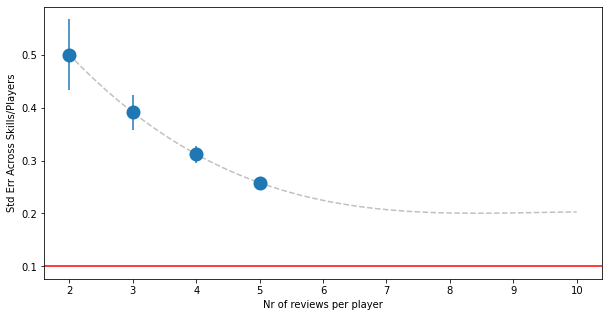

In [272]:
# How many reviews do we need?
import itertools
reviewers = df['pic'].unique()
val, stv = [], []
groups = range(2, 6)
for c in groups:
    _val = []
    for revs in itertools.combinations(reviewers, c):
        _df = df[df['pic'].isin(revs)]
        _df = _df[['player'] + clm]
        _val.append(_df.groupby('player').std().mean().mean())
    val.append(2 * np.mean(_val) / c)    
    stv.append(2 * np.std(_val) / c)

# Fit
z = np.polyfit(groups, val, 3)
p = np.poly1d(z)
_, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(2, 10, 100)
ax.plot(x, p(x), '--', color='silver')
# ax.plot(groups, val
ax.errorbar(groups, val, stv, marker='o', ms=10, mew=4, linestyle='')
ax.set_xlabel('Nr of reviews per player')
ax.set_ylabel('Std Err Across Skills/Players')
plt.axhline(y=0.10, color='r', linestyle='-');

In [152]:
# Most confusing skills
S = df.groupby('player').std()
S.mean().sort_values().index
clm = ['short passing', 'balance', 'pace', 'interceptions', 'positioning',
       'acceleration', 'supportive to teammates',
       'attacking creativity and deception', 'dribbling', 'marking',
       'ball control', 'strength', 'reactions', 'awareness', 'composure',
       'ball shielding', 'communication during game', 'agility', 'vision',
       'long passing', 'defending', 'finishing', 'stamina', 'standing tackle']

[('J', 'M'),
 ('J', 'Y'),
 ('J', 'S'),
 ('J', 'G'),
 ('M', 'Y'),
 ('M', 'S'),
 ('M', 'G'),
 ('Y', 'S'),
 ('Y', 'G'),
 ('S', 'G')]

Index(['long passing', 'defending', 'finishing', 'stamina', 'standing tackle'], dtype='object')


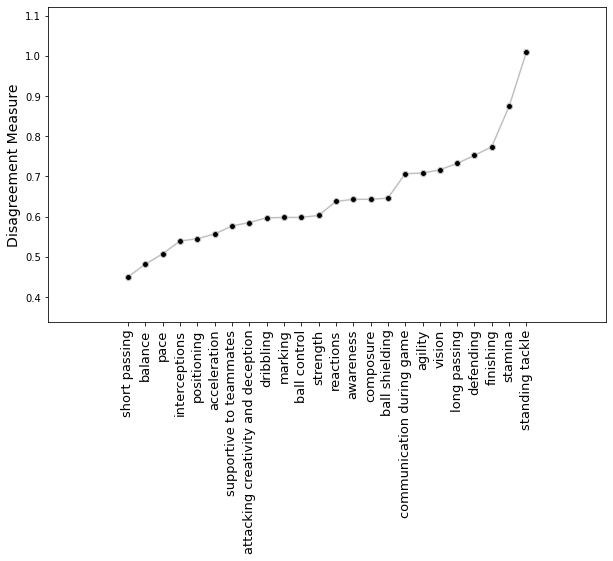

In [244]:
s = S.mean().sort_values()
x = s.index
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(s, '-o', color='silver', markerfacecolor='k')
plt.xticks(range(len(x)), x, rotation='vertical', fontsize=13)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.ylabel('Disagreement Measure', size=14)
print(x[-5:])

,awareness,composure,interceptions,marking,positioning,vision,acceleration,agility,balance,pace,...,defending,dribbling,finishing,long passing,short passing,standing tackle,communication during game,ball shielding,supportive to teammates,attacking creativity and deception
player,,,,,,,,,,,,,,,,,,,,,
Ashish,0.547723,0.547723,0.447214,0.447214,0.000000,0.836660,0.894427,1.000000,0.000000,0.547723,...,0.447214,0.707107,0.447214,0.447214,0.447214,0.836660,0.447214,1.140175,0.447214,0.547723
Emmanuel,0.447214,0.447214,0.707107,0.547723,0.447214,0.447214,0.000000,0.447214,0.547723,0.447214,...,1.483240,0.447214,0.836660,0.447214,0.000000,1.224745,0.707107,0.547723,0.547723,0.447214
Jack,0.836660,0.836660,0.447214,0.547723,0.547723,0.547723,0.447214,0.547723,0.447214,0.447214,...,0.836660,0.447214,0.836660,0.836660,0.547723,1.000000,0.447214,0.547723,0.447214,0.836660
Jasper,0.547723,0.836660,0.547723,1.000000,0.894427,0.447214,0.894427,1.000000,0.707107,0.547723,...,0.547723,0.836660,0.447214,1.095445,0.707107,0.894427,0.836660,0.447214,0.547723,0.547723
Mike,0.836660,0.547723,0.547723,0.447214,0.836660,1.303840,0.547723,0.547723,0.707107,0.547723,...,0.447214,0.547723,1.303840,0.836660,0.547723,1.095445,1.095445,0.547723,0.894427,0.547723


In [250]:
df[skills].reset_index(drop=True).corr()

,supportive to teammates,standing tackle,attacking creativity and deception,ball shielding,communication during game,acceleration,ball control,dribbling,vision,awareness,...,composure,pace,finishing,interceptions,stamina,defending,reactions,strength,positioning,short passing
supportive to teammates,1.000000,2.617434e-01,-0.037734,-0.070244,0.282060,-0.221790,0.213713,-0.063499,0.351220,0.639627,...,0.504743,-0.080817,3.007115e-01,3.311331e-01,0.017561,0.299452,0.392601,6.113950e-02,0.606143,0.190964
standing tackle,0.261743,1.000000e+00,-0.144164,0.032686,0.499754,0.089182,0.070658,-0.065767,0.286003,0.163303,...,0.074169,0.007279,-2.902404e-01,6.355940e-01,0.128020,0.731542,0.290737,7.580478e-17,0.318910,0.155881
attacking creativity and deception,-0.037734,-1.441644e-01,1.000000,0.713892,-0.199402,0.636048,0.821705,0.792715,0.565459,0.451103,...,0.511781,0.694117,6.623854e-01,4.998001e-02,0.413492,-0.025192,0.536210,5.536903e-01,0.063765,0.685898
ball shielding,-0.070244,3.268602e-02,0.713892,1.000000,-0.111540,0.540539,0.640513,0.794626,0.291667,0.261892,...,0.335212,0.593816,2.759213e-01,5.892557e-02,0.618056,0.061150,0.460079,5.657524e-01,-0.008172,0.391659
communication during game,0.282060,4.997536e-01,-0.199402,-0.111540,1.000000,0.060071,-0.024730,-0.357282,0.171600,0.168700,...,-0.076106,0.166222,-9.641768e-02,3.033480e-01,0.188760,0.325592,0.301762,1.792299e-01,0.247353,-0.161301
acceleration,-0.221790,8.918162e-02,0.636048,0.540539,0.060071,1.000000,0.478116,0.619989,0.214499,0.142427,...,0.031858,0.693547,3.977229e-01,1.213392e-01,0.633488,0.304006,0.400010,6.273046e-01,-0.079086,0.398507
ball control,0.213713,7.065836e-02,0.821705,0.640513,-0.024730,0.478116,1.000000,0.763452,0.560449,0.509688,...,0.652380,0.704235,4.659273e-01,2.264554e-01,0.493728,0.100716,0.646673,5.017452e-01,0.109913,0.763656
dribbling,-0.063499,-6.576692e-02,0.792715,0.794626,-0.357282,0.619989,0.763452,1.000000,0.364507,0.269055,...,0.336861,0.663961,3.774318e-01,1.546474e-01,0.515170,0.064194,0.415901,5.330018e-01,-0.101510,0.653013
vision,0.351220,2.860027e-01,0.565459,0.291667,0.171600,0.214499,0.560449,0.364507,1.000000,0.772247,...,0.601662,0.324743,5.434813e-01,4.714045e-01,0.069444,0.218393,0.596398,1.305582e-01,0.572005,0.575970
awareness,0.639627,1.633027e-01,0.451103,0.261892,0.168700,0.142427,0.509688,0.269055,0.772247,1.000000,...,0.684308,0.155516,6.036968e-01,4.273522e-01,0.049245,0.284393,0.547874,1.402758e-01,0.755934,0.452990


In [260]:
C = df[skills].reset_index(drop=True).corr().values
res = []
for i in range(len(C)):
    for j in range(i+1, len(C)):
        if C[i][j] > .8:
            res.append((C[i][j], skills[i], skills[j]))
print(sorted(res))

[(0.8030200930495263, 'interceptions', 'defending'), (0.8103110007691826, 'pace', 'stamina'), (0.821704510694778, 'attacking creativity and deception', 'ball control')]


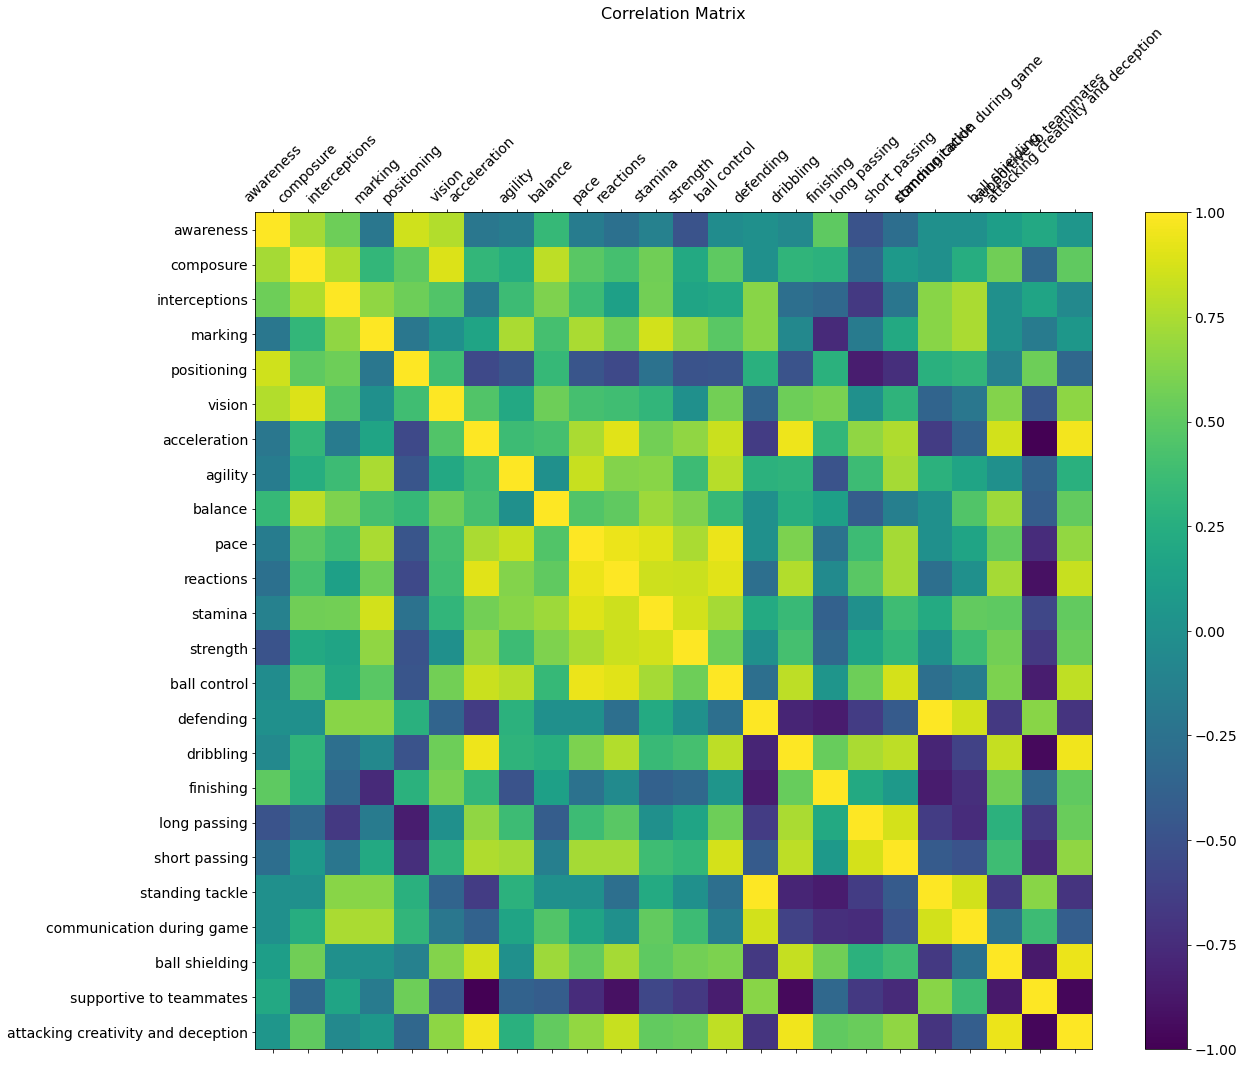

In [73]:
_df = df[df['player']=='Jasper']
_df = df[df['pic']=='S']

f = plt.figure(figsize=(19, 15))
plt.matshow(_df.corr(), fignum=f.number)
plt.xticks(range(_df.select_dtypes(['number']).shape[1]), _df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(_df.select_dtypes(['number']).shape[1]), _df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);